# Part I - (Ford GoBike System Data)
## by (Alanoud Alomar)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.There is over 100k observation and 16 columns in this dataset, there is categorical and numerical values.the data represent bike  users information and divded to Customers and Subscribers also have duration time for evey user and many special valuse



## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
#read data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
# #to see some data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#to see how many column and row 
df.shape

(183412, 16)

In [7]:
# to see data type for columns 
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
# change data type to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [12]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [13]:
# change datatype to string 
df['start_station_id'] = df.start_station_id.astype(str)
df['end_station_id'] = df.end_station_id.astype(str)
df['bike_id'] = df.bike_id.astype(str)
df['user_type'] = df.user_type.astype('category')

In [14]:
# create column for hour and day from start_time column 
# https://appdividend.com/2020/01/21/how-to-convert-datetime-to-string-in-python/

df['hour'] = df['start_time'].dt.strftime('%H')
df['day'] = df['start_time'].dt.strftime('%a')


In [15]:
# create column for dumration im minute
df.insert(1,'duration_min', df.duration_sec/60)

In [16]:
df.head(1)

,duration_sec,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,day
0,52185,869.75,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thu


In [17]:
# drop unneeded columns
df.drop( columns=['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude', 'duration_sec'], inplace=True, axis=1)

In [18]:
df_clean = df.dropna()

In [19]:
df_clean.shape

(174952, 14)

In [20]:
df_clean.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,day
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,17,Thu
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,12,Thu
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,17,Thu
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,23,Thu
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,23,Thu


### What is the structure of your dataset?

> There is over 100k observation and 16 columns in this dataset, there is categorical and numerical values.the data represent bike  users information and divded to Customers and Subscribers also have duration time for evey user and many special valuse

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in duration time comparing with another feature like user type, gender and others  .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think  trip duration, day and birth year for user of the trip will be useful in comparing different features such as gender and user type.

## Univariate Exploration


In [21]:
# to avoid duplicate code 
def x_y_t (xl, yl, title) :
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title) 
   
    

### How long duration of trips ?  

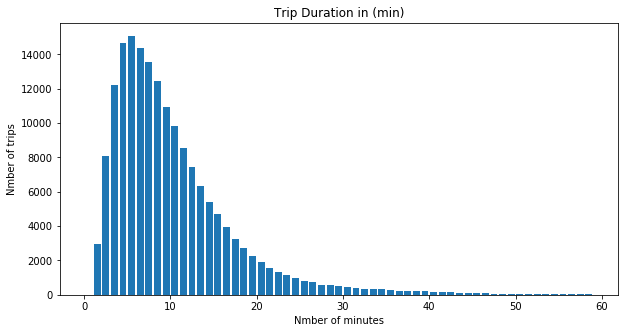

In [22]:
# for x Axis 
bins = np.arange(0,60,1)
#  figure size
plt.figure(figsize=[10, 5]);
plt.hist(data = df_clean, x = 'duration_min',bins= bins , rwidth= 0.8);
x_y_t(xl='Nmber of minutes',yl='Nmber of trips',title= 'Trip Duration in (min)' );



average most trips between 3-12 min

### How many trips in a week ?

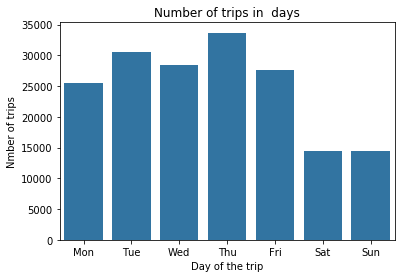

In [41]:
# make all bars with one color and make  the days of the week ordered in the right order 
sb.countplot(data=df_clean, x='day',order =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"], color= sb.color_palette()[0]);
x_y_t(xl='Day of the trip',yl='Nmber of trips',title= 'Number of trips in  days' );

Most bike use on Thursday and least on Saturday and Sunday


### - Gender

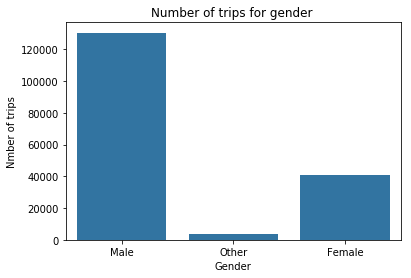

In [27]:
sb.countplot(data=df_clean, x='member_gender', color=sb.color_palette()[0]);
x_y_t(xl='Gender',yl='Nmber of trips',title= 'Number of trips for gender ' );


males use bike more than females

### - User type (Subscriber,Customer )

In [28]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

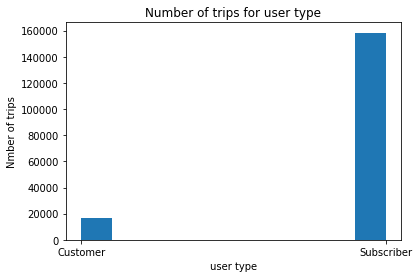

In [29]:
plt.hist(data=df_clean, x='user_type', color=sb.color_palette()[0]);
x_y_t(xl='user type',yl='Nmber of trips',title= 'Number of trips for user type' );


subscribers users more usage bike 

### - Hour

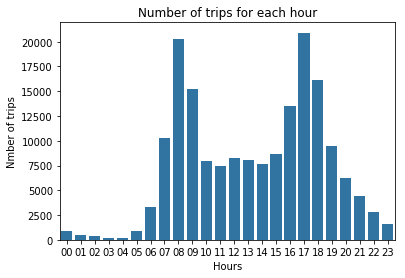

In [30]:
sb.countplot(data=df_clean, x='hour', color=sb.color_palette()[0])
x_y_t(xl='Hours',yl='Nmber of trips',title= 'Number of trips for each hour' );


bike usage increases at 7-10 am  and 4-7pm

### Brith year

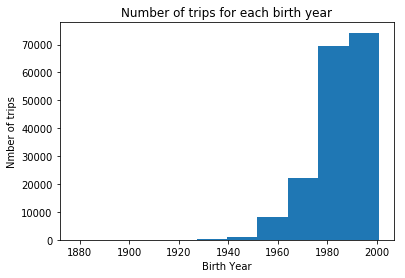

In [31]:
plt.hist(data=df_clean, x='member_birth_year')
x_y_t(xl='Birth Year',yl='Nmber of trips',title= 'Number of trips for each birth year' );

As we can see data below 1960 very small, and it uncommon old people can use bike. These data will be checked.

In [32]:
# to determine all birth year greater than 1940
df_clean = df_clean.query('member_birth_year > 1940')

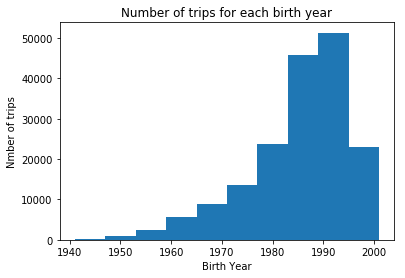

In [33]:
plt.hist(data=df_clean, x='member_birth_year')
x_y_t(xl='Birth Year',yl='Nmber of trips',title= 'Number of trips for each birth year' );


People born between 1980 and 2000 more used bike 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No i didnt have to prefom transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I had to clean data as well as perform some operations I did extract day and hour from start_day also i drop birth year greater than 1940 this was done because i want to know influenced these features to duration.

## Bivariate Exploration



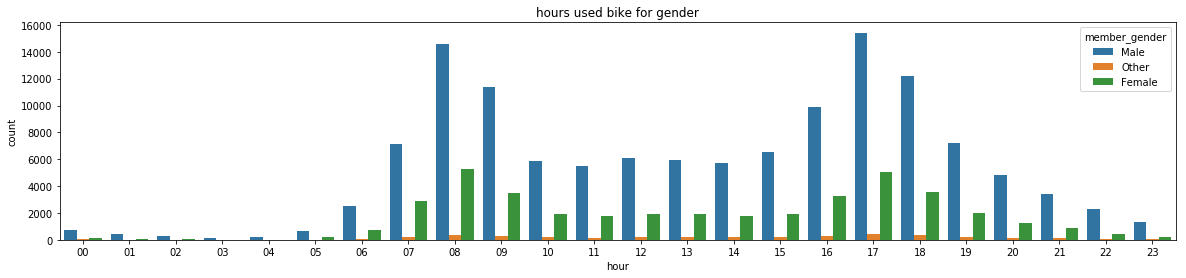

In [30]:
plt.figure(figsize=[20, 4])
sb.countplot(data=df_clean, x='hour', hue='member_gender')
plt.title('hours used bike for gender');


more use bike for males and females in morning and evening 

### User type vs duration min 

Text(0.5,1,'duration of trip according to user type ')

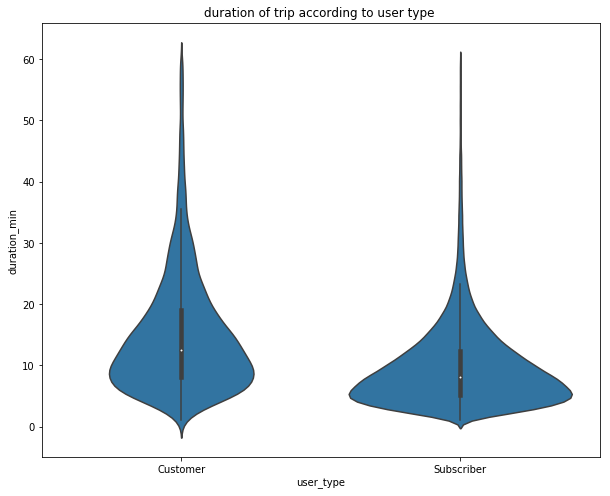

In [31]:
plt.figure(figsize= [10,8])
sb.violinplot(data = df_clean.query('duration_min <= 60') , x= 'user_type',y='duration_min',color=sb.color_palette()[0]);
plt.title('duration of trip according to user type ');

### Duration according to weekdays

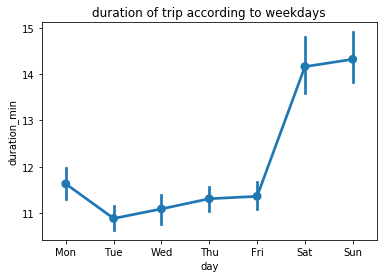

In [36]:
# make all bars with one color and make  the days of the week ordered in the right order
sb.pointplot(data = df_clean , x='day',y='duration_min',order =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"], color=sb.color_palette()[0]);
plt.title('duration of trip according to weekdays');

The longest duration of use is on Saturday and Sunday 

### Duration trip according to member birth year

Text(0.5,1,'duration of trip according to brith year ')

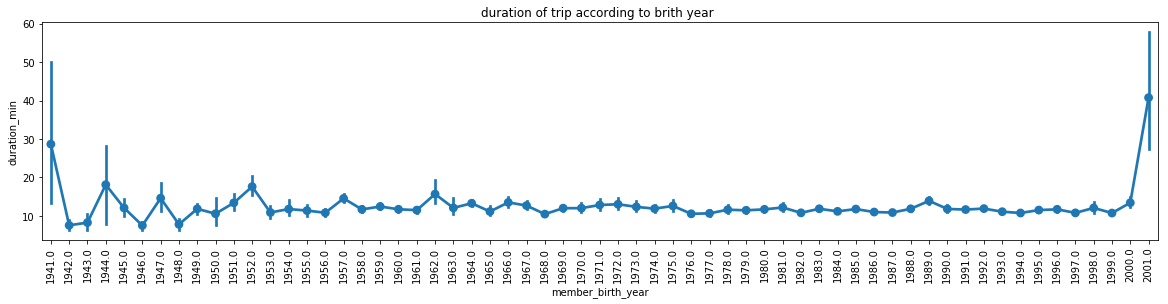

In [33]:
plt.figure(figsize=[20, 4])
sb.pointplot(data=df_clean, x='member_birth_year', y='duration_min')
plt.xticks(rotation=90)
plt.title('duration of trip according to brith year ')

The duration is stable for all years only in the year 2001 and 1941 an increase in the duration appears

### Gender vs weeksdays

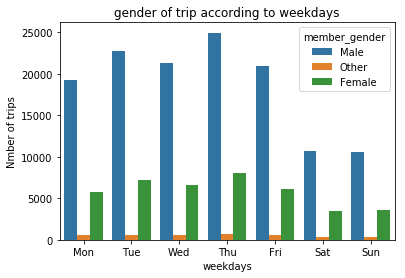

In [37]:
sb.countplot(data=df_clean, x='day',order =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"], hue='member_gender')
x_y_t(xl='weekdays',yl='Nmber of trips',title= 'gender of trip according to weekdays' );


on all weekdays males use bike more 

### Gender of trip according to user type

Text(0.5,1,'gender of trip according to user type  ')

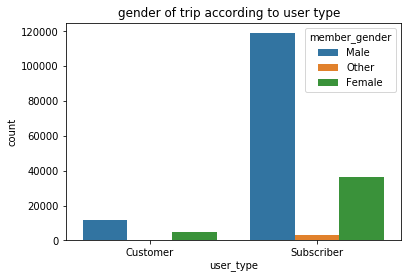

In [35]:
sb.countplot(data=df_clean, x='user_type', hue='member_gender')
plt.title('gender of trip according to user type  ')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In comparing the birth year, day  with Trip Duration: from the above figure, the longest duration in 2001 also, the longest duration it was in weekend .
hour with member gender: for both males and females bike usage has decreased in the late hours of the night.
for both males and females subscribers more use bike than costumers  . 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> number of subscriber use bike more than customers

## Multivariate Exploration


### Trip duration across user type in weekdays.

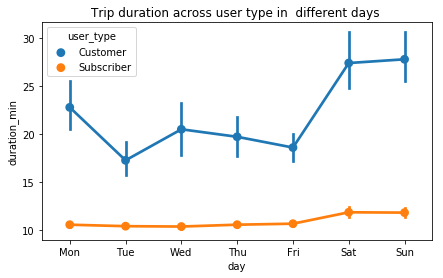

In [39]:
fig = plt.figure(figsize = [7,4])
sb.pointplot(data = df_clean, x = 'day', y = 'duration_min',order =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"], hue = 'user_type');
plt.title('Trip duration across user type in  different days ');

customers have duration trip longer than subscribers for all days

### Trip duartion across gender type in different days

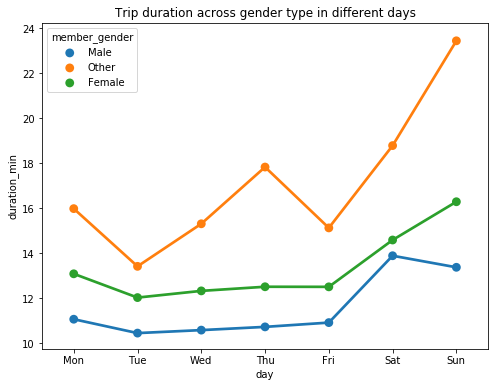

In [40]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'day', y = 'duration_min',order =["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"], hue = 'member_gender',  ci=None);
plt.title('Trip duration across gender type in different days');


female have longer duration trip than male in all days 

### member_gender vs duration_min vs user_type

Text(0.5,1,'Trip duration across gender type in different user type ')

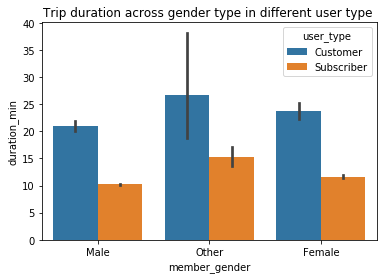

In [38]:
sb.barplot(data=df_clean, x='member_gender', y='duration_min', hue='user_type')
plt.title('Trip duration across gender type in different user type ')

customers have long duration trip than subscribers, females have longer trip than males

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> when looking to trip duration across user type in weekdays, we see customers have duration trip higher than subscribers for all days. 
Trip duration across gender type in different days, we see female have longer duration trip than male in all days .

### Were there any interesting or surprising interactions between features?

> females have longer duration trip than male .Also, customers have duration trip longer than subscribers for all days ,this was a surprise to me

In [39]:
df_clean.to_csv('df_clean.csv', index=False)